# Data Mining and Machine Learning Coursework

# Part (A): Breast Cancer Mortality Prediction

## Task (1) - Domain Understanding: Classification

### Installing and importing required libraries

In [450]:
# Importing the libraries

import pandas as pd
import numpy as np
import pycaret
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

### Loading and displaying the dataset

In [452]:
# reading the data
Mort_pred = pd.read_csv(r"C:\Users\soham\OneDrive\Desktop\Datasets\Breast_Cancer_Mortality_Survival_Dataset.csv")

# displaying the first five rows of the data set
Mort_pred.head()

,Patient ID,Moth of Birth,Age,Sex,Race,Marital Status,Occupation Code,Adopted Status,T Stage,N Stage,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,A0012,12,68.0,Female,White,Married,11.0,1,T1,N1,...,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,A0013,12,50.0,Female,White,Married,11.0,0,T2,N2,...,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,A0014,11,58.0,Female,White,Divorced,9.0,0,T3,N3,...,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,A0015,3,58.0,Female,White,Married,10.0,0,T1,N1,...,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,A0016,1,47.0,Female,White,Married,12.0,0,T2,N1,...,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive


In [453]:
# Displaying a list of features

Mort_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient ID              4024 non-null   object 
 1   Moth of Birth           4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     3947 non-null   object 
 4   Race                    4024 non-null   object 
 5   Marital Status          4024 non-null   object 
 6   Occupation Code         4021 non-null   float64
 7   Adopted Status          4024 non-null   int64  
 8   T Stage                 4024 non-null   object 
 9   N Stage                 4024 non-null   object 
 10  6th Stage               4024 non-null   object 
 11  differentiate           4024 non-null   object 
 12  Grade                   4024 non-null   int64  
 13  A Stage                 4024 non-null   object 
 14  Tumor Size              4021 non-null   

### Checking for unique values in certain features

In [455]:
# Checking whether there are any other "sex" to decide whether to retain or drop said feature whilst model building

genders = Mort_pred['Sex'].unique()
print(genders)

['Female' nan]


According to the above codeblock, we can determine that there's no other "sex" other than "Female". We can drop the column as retaining it won't make a difference in the final model.

In [457]:
# Checking for unique values in the "Race" feature

races = Mort_pred['Race'].unique()
print(races)

['White' 'Black' 'Other']


In [458]:
# Checking for unique values in the "Occupation" feature

jobs = Mort_pred['Occupation Code'].unique()
print(jobs)

[11.  9. 10. 12.  6. 16.  7. 15.  3.  4.  2. 13. 14.  8.  5.  1. nan]


In [459]:
# Checking for a female's adoption status

family = Mort_pred['Adopted Status'].unique()
print(family)

[1 0]


In [460]:
# Checking the values for the "6th stage" of the BI-RADs feature

BIRADS = Mort_pred['6th Stage'].unique()
print(BIRADS)

['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']


In [461]:
# Checking for unique values for the "Differentiated" feature

Differentiated = Mort_pred['differentiate'].unique()
print(Differentiated)

['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']


In [462]:
# Checking for unique values in the "Grade" feature

grades = Mort_pred['Grade'].unique()
print(grades)

[3 2 1 4]


### Dropping the unnecessary features before building the model

In [464]:
# Making a copy of the data set
Mort_prediction = Mort_pred
# Note: We will be working on the copy of the data set henceforth

In [465]:
# Renaming the column names to fix further inconsistencies

Mort_prediction.rename(columns={'Moth of Birth': 'Month of Birth'}, inplace=True)
Mort_prediction.rename(columns={'Patient ID ': 'Patient ID'}, inplace=True)
Mort_prediction.head()

,Patient ID,Month of Birth,Age,Sex,Race,Marital Status,Occupation Code,Adopted Status,T Stage,N Stage,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,A0012,12,68.0,Female,White,Married,11.0,1,T1,N1,...,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,A0013,12,50.0,Female,White,Married,11.0,0,T2,N2,...,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,A0014,11,58.0,Female,White,Divorced,9.0,0,T3,N3,...,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,A0015,3,58.0,Female,White,Married,10.0,0,T1,N1,...,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,A0016,1,47.0,Female,White,Married,12.0,0,T2,N1,...,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive


In [466]:
# Creating an array of all the columns to be dropped
columns_to_be_dropped = ['Patient ID','Month of Birth','Sex','Occupation Code','Survival Months']

# Removing the features from the data set
Mort_prediction = Mort_prediction.drop(columns=columns_to_be_dropped)

In [467]:
# Checking column names from the data set

print(Mort_prediction.columns)

Index(['Age', 'Race', 'Marital Status', 'Adopted Status', 'T Stage ',
       'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Mortality_Status'],
      dtype='object')


### Generating more information about the given Data set (Task (2))

In [469]:
# Gathering numerical data from the data set

Mort_prediction.describe()

,Age,Adopted Status,Grade,Tumor Size
count,4015.000000,4024.000000,4024.000000,4021.000000
mean,54.094396,0.496769,2.150596,30.419299
std,11.417118,0.500052,0.638234,21.161080
min,30.000000,0.000000,1.000000,-75.000000
25%,47.000000,0.000000,2.000000,16.000000
50%,54.000000,0.000000,2.000000,25.000000
75%,61.000000,1.000000,3.000000,38.000000
max,502.000000,1.000000,4.000000,140.000000


In [470]:
# Finding out more information about the dataset like its column names, no. of observations and data types

Mort_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4021 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4023 non-null   object 
 14  Reginol Node Positive   4024 non-null   

### Generating a basic statistical distribution of the target variable "Mortality Status"

In [472]:
# Fixing inconsistencies with the observations for the target variable "Mortality Status"

# Standardizing the text data with the first letter capitalized
Mort_prediction['Mortality_Status'] = Mort_prediction['Mortality_Status'].str.strip().str.title()

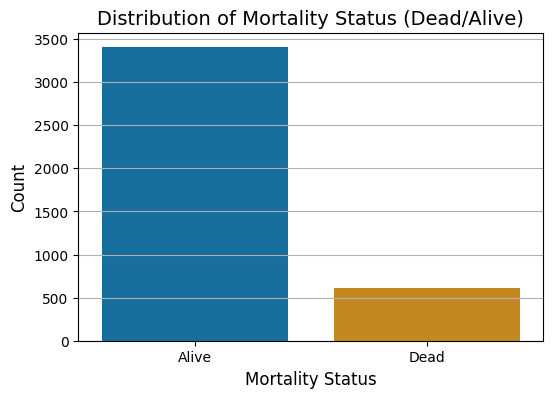

In [473]:
# Generating a histogram to show the distribution of Target feature using the "Seaborn" library

plt.figure(figsize=(6, 4))
sns.countplot(x='Mortality_Status', data=Mort_prediction, palette='colorblind')

# Adding title and labels
plt.title('Distribution of Mortality Status (Dead/Alive)', fontsize=14)
plt.xlabel('Mortality Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

### Task (3) - Data Preparation

#### Handling Missing Values

In [476]:
# Checking the data for any missing values

missing_values = Mort_prediction.isnull().sum()
missing_values

Age                       9
Race                      0
Marital Status            0
Adopted Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                3
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    1
Reginol Node Positive     0
Mortality_Status          4
dtype: int64

In [477]:
# finding out the percentage of missing data in each column

missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.223658
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.074553
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.024851
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

In [478]:
# Handling missing data in "Age" column using Median imputation

from sklearn.impute import SimpleImputer

# Performing Median imputation
columns_to_impute_median = ['Age', 'Tumor Size']

# Initializing SimpleImputer using 'median'
imputer = SimpleImputer(strategy='median')

# Transforming only the "Age" and "Tumor Size" columns
Mort_prediction[columns_to_impute_median] = imputer.fit_transform(Mort_prediction[columns_to_impute_median])

In [479]:
# Checking for the NaN values post-imputation
missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.000000
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.024851
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

In [480]:
# Converting the "Regional Node Examined" feature from Object to Numeric to fix further inconsistencies

Mort_prediction['Regional Node Examined'] = pd.to_numeric(Mort_prediction['Regional Node Examined'], errors='coerce')
Mort_prediction.info()           # To check data types after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4024 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4022 non-null   float64
 14  Reginol Node Positive   4024 non-null   

In [481]:
# Checking for NaN values after type conversion to ensure that more NaN hasn't been imputed

missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.000000
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.049702
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

The percentage of missing values has gone up by around 3%, hence there were inconsistencies in the feature. Now we fill the missing data using simple imputation methods

In [483]:
# Handling missing data in the "Regional Node Examined" feature using Mean imputation

from sklearn.impute import SimpleImputer

# Performing Median imputation
columns_to_impute_mean = ['Regional Node Examined']

# Initializing SimpleImputer using 'mean'
imputer = SimpleImputer(strategy='mean')

# Transforming only the "Regional Node Examined" column
Mort_prediction[columns_to_impute_mean] = imputer.fit_transform(Mort_prediction[columns_to_impute_mean])

In [484]:
# Checking for NaN values post-imputation
missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.000000
Race                      0.000000
Marital Status            0.000000
Adopted Status            0.000000
T Stage                   0.000000
N Stage                   0.000000
6th Stage                 0.000000
differentiate             0.000000
Grade                     0.000000
A Stage                   0.000000
Tumor Size                0.000000
Estrogen Status           0.000000
Progesterone Status       0.000000
Regional Node Examined    0.000000
Reginol Node Positive     0.000000
Mortality_Status          0.099404
dtype: float64

In [485]:
# Handling Missing data in the target variable "Mortality_Status" using Mode imputation

# Calculate mode of the 'Mortality_Status' column
mode_value = Mort_prediction['Mortality_Status'].mode()[0]  # .mode() returns a Series, [0] to get the first mode

# Applying modal imputation only to the "Mortality_Status" column
Mort_prediction['Mortality_Status'].fillna(mode_value, inplace = True)

In [486]:
# Checking for NaN values post-imputation
missing_values = Mort_prediction.isnull().sum()
missing_values_percentage = (missing_values / len(Mort_prediction)) * 100
missing_values_percentage

Age                       0.0
Race                      0.0
Marital Status            0.0
Adopted Status            0.0
T Stage                   0.0
N Stage                   0.0
6th Stage                 0.0
differentiate             0.0
Grade                     0.0
A Stage                   0.0
Tumor Size                0.0
Estrogen Status           0.0
Progesterone Status       0.0
Regional Node Examined    0.0
Reginol Node Positive     0.0
Mortality_Status          0.0
dtype: float64

In [487]:
# Viewing the data set

Mort_prediction.head()

,Age,Race,Marital Status,Adopted Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Mortality_Status
0,68.0,White,Married,1,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,Alive
1,50.0,White,Married,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,Alive
2,58.0,White,Divorced,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,Alive
3,58.0,White,Married,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1,Alive
4,47.0,White,Married,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1,Alive


#### Handling outliers

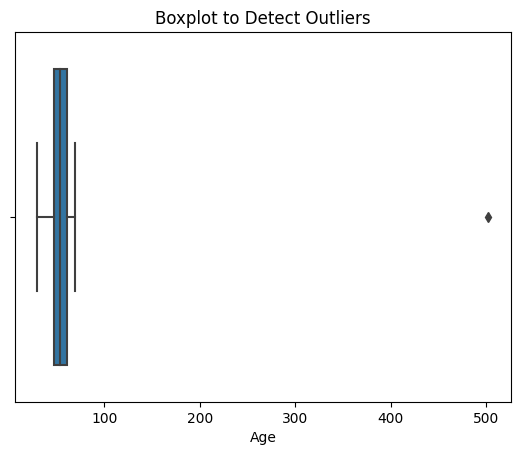

In [489]:
# Checking for outliers using a boxplot

sns.boxplot(data=Mort_prediction, x='Age')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [490]:
# Using Winsorizing / Capping method to cap the outliers within 3 standard deviations (99th percentiles)

lower_cap = Mort_prediction['Age'].quantile(0.01)
upper_cap = Mort_prediction['Age'].quantile(0.99)
Mort_prediction['Age'] = np.clip(Mort_prediction['Age'], lower_cap, upper_cap)

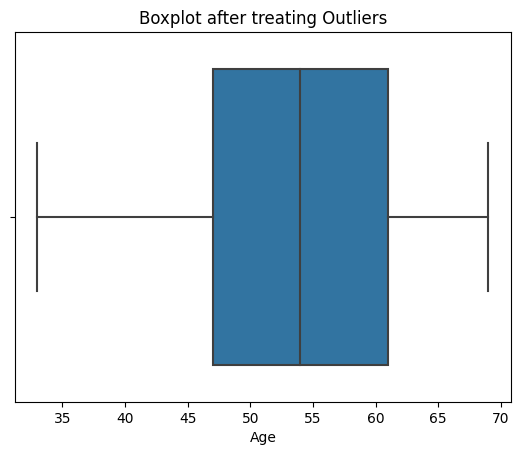

In [491]:
# Checking for outliers using a boxplot

sns.boxplot(data=Mort_prediction, x='Age')
plt.title("Boxplot after treating Outliers")
plt.show()

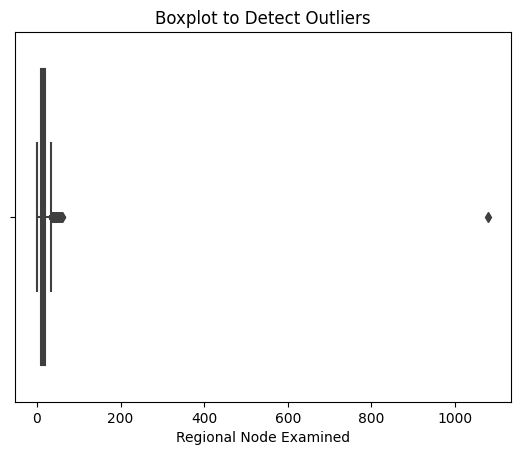

In [492]:
# Checking for outliers using a boxplot

sns.boxplot(data=Mort_prediction, x='Regional Node Examined')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [493]:
# Using Winsorizing / Capping method to cap the outliers within 2 standard deviations (95th percentile)

lower_cap = Mort_prediction['Regional Node Examined'].quantile(0.01)
upper_cap = Mort_prediction['Regional Node Examined'].quantile(0.95)
Mort_prediction['Regional Node Examined'] = np.clip(Mort_prediction['Regional Node Examined'], lower_cap, upper_cap)

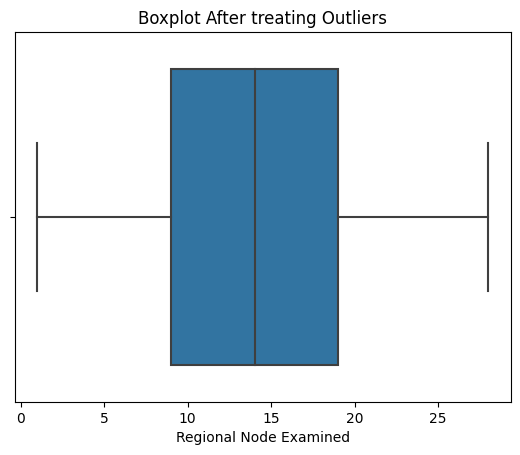

In [494]:
# Plotting a box plot to check outliers

sns.boxplot(data=Mort_prediction, x='Regional Node Examined')
plt.title("Boxplot After treating Outliers")
plt.show()

In [495]:
# Displaying the names of all columns

print(Mort_prediction.columns)

Index(['Age', 'Race', 'Marital Status', 'Adopted Status', 'T Stage ',
       'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Mortality_Status'],
      dtype='object')


In [496]:
# Renaming the column to fix inconsistencies

Mort_prediction.rename(columns={'T Stage ': 'T Stage'}, inplace=True)
Mort_prediction.rename(columns={'Reginol Node Positive': 'Regional Node Positive'}, inplace=True)

In [497]:
# Finding out the amount of unique values in each categorical column

Mort_prediction['Race'].value_counts()

Race
White    3413
Other     320
Black     291
Name: count, dtype: int64

In [498]:
Mort_prediction['Marital Status'].value_counts()

Marital Status
Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: count, dtype: int64

In [499]:
Mort_prediction['Adopted Status'].value_counts()

Adopted Status
0    2025
1    1999
Name: count, dtype: int64

In [500]:
Mort_prediction['T Stage'].value_counts()

T Stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64

In [501]:
Mort_prediction['N Stage'].value_counts()

N Stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64

In [502]:
Mort_prediction['6th Stage'].value_counts()

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

In [503]:
Mort_prediction['differentiate'].value_counts()

differentiate
Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64

In [504]:
Mort_prediction['Grade'].value_counts()

Grade
2    2351
3    1111
1     543
4      19
Name: count, dtype: int64

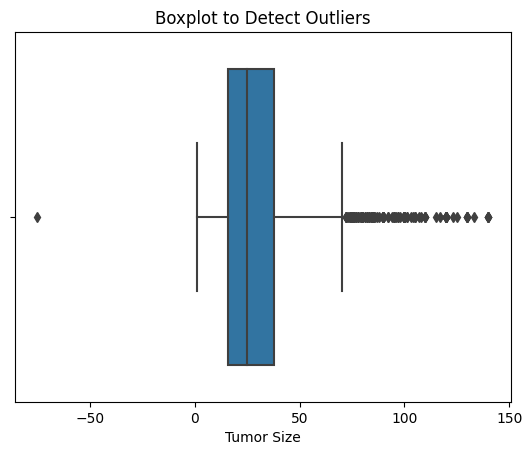

In [505]:
# Creating a boxplot to visualize outliers in the "Tumour Size" Feature

sns.boxplot(data=Mort_prediction, x='Tumor Size')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [506]:
# Finding out the percentage of outliers in the Tumor Size feature

Q1 = Mort_prediction['Tumor Size'].quantile(0.25)
Q3 = Mort_prediction['Tumor Size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_tumor_size = Mort_prediction[(Mort_prediction['Tumor Size'] < lower_bound) | (Mort_prediction['Tumor Size'] > upper_bound)]

outliers_tumor_size
outliers_tumor_size_percentage = (len(outliers_tumor_size) / len(Mort_prediction))*100
outliers_tumor_size_percentage

5.492047713717694

In [507]:
# Dealing with outliers in the "Tumor size" feature
# Calculating Z-scores
mean = Mort_prediction['Tumor Size'].mean()
STDEV = Mort_prediction['Tumor Size'].std()
Mort_prediction['Z-Score'] = (Mort_prediction['Tumor Size'] - mean) / STDEV

# Defining a threshold
threshold = 3

# Identifying the outliers
Mort_prediction['Tumor_Outliers'] = Mort_prediction['Z-Score'].apply(lambda x: 'Yes' if abs(x) > threshold else 'No')

# Capping the outliers
upper_limit = mean + 2 * STDEV
lower_limit = mean - 1 * STDEV

Mort_prediction['Tumor Size'] = np.where(Mort_prediction['Tumor Size'] > upper_limit, upper_limit,
                            np.where(Mort_prediction['Tumor Size'] < lower_limit, lower_limit, Mort_prediction['Tumor Size']))

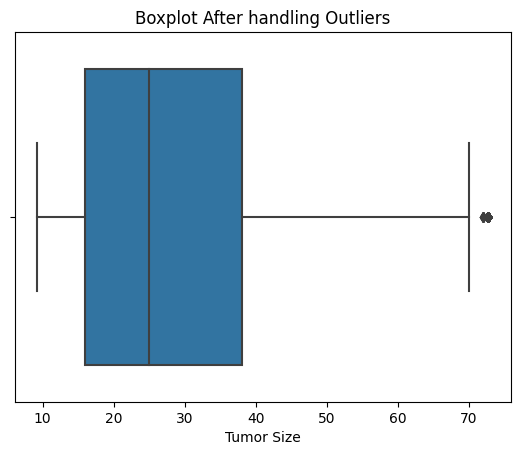

In [508]:
# Creating a boxplot to visualize outliers in the "Tumour Size" Feature

sns.boxplot(data=Mort_prediction, x='Tumor Size')
plt.title("Boxplot After handling Outliers")
plt.show()

In [509]:
Mort_prediction['A Stage'].value_counts()

A Stage
Regional    3932
Distant       92
Name: count, dtype: int64

In [510]:
Mort_prediction['Estrogen Status'].value_counts()

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64

In [511]:
Mort_prediction['Progesterone Status'].value_counts()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

In [512]:
Mort_prediction['Mortality_Status'].value_counts()

Mortality_Status
Alive    3408
Dead      616
Name: count, dtype: int64

### Task (4) - Model Building

#### Using the Train-Test split approach to build models -- Naive Bayes

In [515]:
# Converting Categorical Data into Numerical data to fix errors in the model
from sklearn.preprocessing import LabelEncoder

X = Mort_prediction.drop('Mortality_Status', axis=1)
y = Mort_prediction['Mortality_Status']
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply Label Encoding
encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

In [516]:
# Building a Classification model using Naive bayes

# Importing library
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Split features and target

# Splitting the data into a 80:20 split where 80% is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Naive Bayes model
Naive_Bayes_model = GaussianNB()

# Training the model on the training set
Naive_Bayes_model.fit(X_train, y_train)

# Predict on test data
y_pred = Naive_Bayes_model.predict(X_test)

In [517]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model's performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Specify pos_label for string labels
precision = precision_score(y_test, y_pred, pos_label='Alive')  
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, pos_label='Alive')  
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, pos_label='Alive')  
print(f"F1 Score: {f1 * 100:.2f}%")

# AUC-ROC requires numeric probabilities or labels

try:
    # Assuming y_pred_proba contains probabilities for the positive class
    y_pred_proba = Naive_Bayes_model.predict_proba(X_test)[:, 1]                 # Using [:, 1] for the positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc_roc * 100:.2f}%")
except AttributeError:
    print("AUC-ROC requires probability predictions, which are not available for this model.")
except ValueError as e:
    print("AUC-ROC calculation failed:", e)

Accuracy: 81.74%
Precision: 89.44%
Recall: 89.05%
F1 Score: 89.25%
AUC-ROC: 75.45%


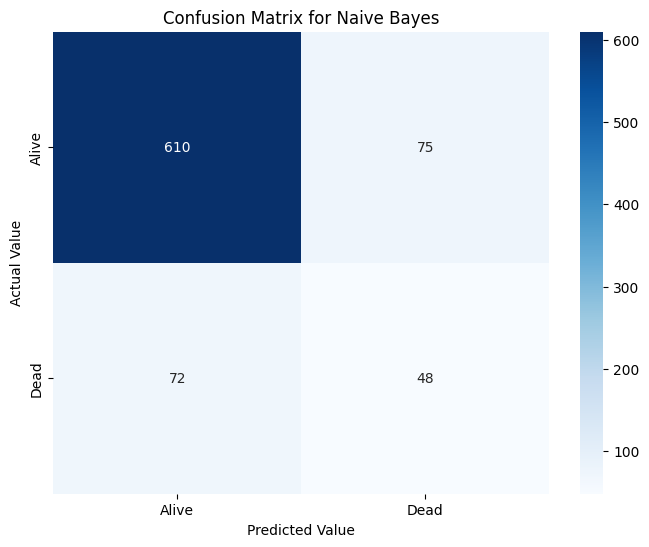

Classification Report:
              precision    recall  f1-score   support

       Alive       0.89      0.89      0.89       685
        Dead       0.39      0.40      0.40       120

    accuracy                           0.82       805
   macro avg       0.64      0.65      0.64       805
weighted avg       0.82      0.82      0.82       805



In [518]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [519]:
# Finding out the learnable parameters of this model

print("Class Prior Probabilities:", Naive_Bayes_model.class_prior_)
print("Feature Means (per class):", Naive_Bayes_model.theta_)
print("Class Labels:", Naive_Bayes_model.classes_)

Class Prior Probabilities: [0.84591488 0.15408512]
Feature Means (per class): [[ 5.36088873e+01  1.77377892e+00  1.37825927e+00  4.96511201e-01
   7.38156445e-01  3.72383401e-01  1.20492104e+00  7.05471906e-01
   2.10760191e+00  9.83474109e-01  2.84991210e+01  9.50789570e-01
   8.53103195e-01  1.38672899e+01  1.19019464e+01 -6.01155577e-02
   1.50569225e-02]
 [ 5.52620968e+01  1.73185484e+00  1.46169355e+00  5.12096774e-01
   1.06048387e+00  8.42741935e-01  2.07459677e+00  6.71370968e-01
   2.38104839e+00  9.41532258e-01  3.51026302e+01  8.28629032e-01
   6.69354839e-01  1.45000000e+01  1.51310484e+01  2.85928682e-01
   2.62096774e-02]]
Class Labels: ['Alive' 'Dead']


Best Parameters: {'var_smoothing': 0.01}
Accuracy of tuned model: 81.74%


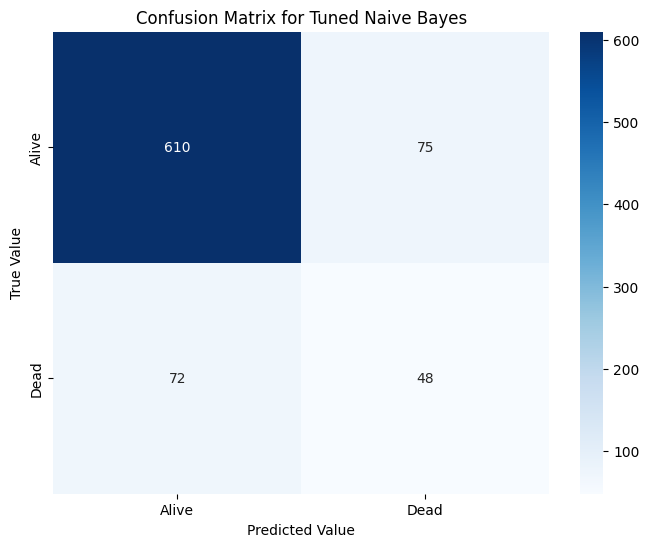

In [520]:
# Tuning and Re-Training the model using hyperparameters -- GridSearchCV
from sklearn.model_selection import GridSearchCV

# Defining the model
model = GaussianNB()

# Defining the hyperparameter grid
param_grid = {
    'var_smoothing': [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)

# Evaluate the accuracy of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of tuned model: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Tuned Naive Bayes')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

#### Using the Train Test split method to build models -- Logistic Regression

In [522]:
# Building a classification model using Logistic Regression

# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Converting Categorical Data into Numerical data to fix errors in the model
from sklearn.preprocessing import LabelEncoder

X = Mort_prediction.drop('Mortality_Status', axis=1)
y = Mort_prediction['Mortality_Status']

# Convert categorical features to numerical using OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg_model.predict(X_test)

In [523]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model's performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Specify pos_label for string labels
precision = precision_score(y_test, y_pred, pos_label='Alive')  
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, pos_label='Alive')  
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, pos_label='Alive')  
print(f"F1 Score: {f1 * 100:.2f}%")

# AUC-ROC requires numeric probabilities or labels

try:
    # Assuming y_pred_proba contains probabilities for the positive class
    y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]            # Use [:, 1] for the positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc_roc * 100:.2f}%")
except AttributeError:
    print("AUC-ROC requires probability predictions, which are not available for this model.")
except ValueError as e:
    print("AUC-ROC calculation failed:", e)

Accuracy: 87.08%
Precision: 87.48%
Recall: 98.98%
F1 Score: 92.88%
AUC-ROC: 74.61%


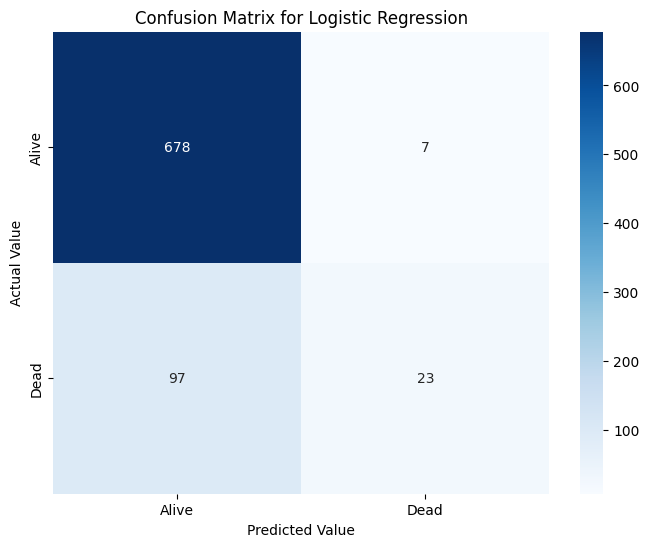

In [524]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [525]:
# Displaying its learnable parameters

print("Learnable parameters of the Logistic Regression model:")
print("Coefficients (weights):")
print(log_reg_model.coef_)  # Coefficients for each feature (Weights)
print("\nIntercept (bias):")
print(log_reg_model.intercept_)  # Intercept (Bias)

Learnable parameters of the Logistic Regression model:
Coefficients (weights):
[[ 0.02334608  0.04345367 -0.07063359 -0.00368413 -0.04079692  0.11929101
  -1.05359542 -0.45486269 -0.29208304  0.55757928 -0.08112282 -0.17564761
   0.13164158  0.46570237  0.713028    0.84228915  1.03457536  0.38295291
  -0.02613742  0.05827352  1.03457536  0.49721252  0.59859396 -0.45995122
  -0.08693631 -0.64681074 -0.64031626 -0.48245113 -1.03258951 -0.69841278
  -0.79957681 -0.8003633   0.28110228  0.43172716  0.3888977  -0.50794054
   0.53583324 -0.04948405  0.21842292 -0.07856528  1.06945351  0.23849639
   0.55224119  0.38586118 -0.44647262  0.61292556  0.15648842  0.63158834
   0.29799515  0.48194863  0.18520225 -0.12489378  0.          0.19199103
   0.06391941 -0.09883615  0.09081722 -0.07929126  0.14640106  0.12960166
   0.1973165   0.33964564  0.20190851  0.5103802   0.         -0.49884771]]

Intercept (bias):
[-1.30814333]


In [526]:
# Using GridSearchCV to find the optimal Hyperparameters to tune the model
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'penalty': ['l1', 'l2'],            # Regularization type
    'solver': ['liblinear', 'saga'],    # Solvers that support l1 and l2
    'max_iter': [100, 200, 500]         # Maximum iterations for convergence
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_log_reg_model = grid_search.best_estimator_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [527]:
# Using the Hyperparameters found via GridSearchCV to tune and Re-train the model

best_params = {
    'penalty': 'l1',
    'C': 10,
    'solver': 'liblinear',
    'max_iter': 100
}

# Reinitializing the model with best hyperparameters
tuned_log_reg = LogisticRegression(**best_params)

# Training the model on data
tuned_log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = tuned_log_reg.predict(X_test)

Accuracy: 86.83%
Precision: 87.55%
Recall: 98.54%
F1 Score: 92.72%
AUC-ROC: 73.99%


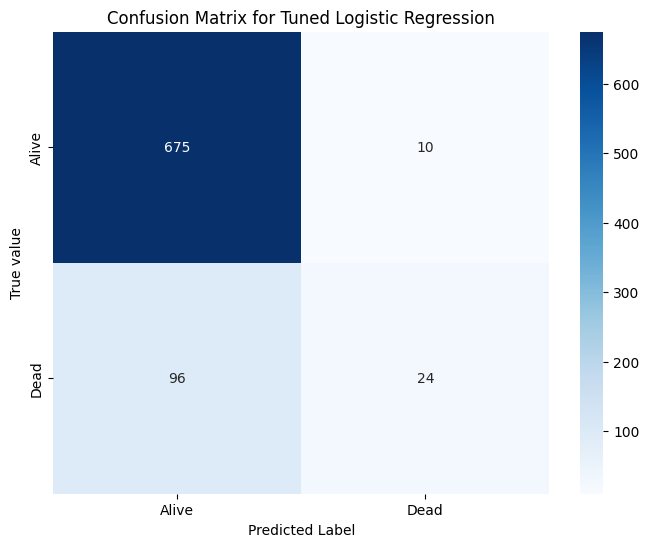

In [528]:
# Evaluate the model's performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Specify pos_label for string labels
precision = precision_score(y_test, y_pred, pos_label='Alive')  
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, pos_label='Alive')  
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, pos_label='Alive')  
print(f"F1 Score: {f1 * 100:.2f}%")

# AUC-ROC requires numeric probabilities or labels

try:
    # Assuming y_pred_proba contains probabilities for the positive class
    y_pred_proba = tuned_log_reg.predict_proba(X_test)[:, 1]            # Use [:, 1] for the positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc_roc * 100:.2f}%")
except AttributeError:
    print("AUC-ROC requires probability predictions, which are not available for this model.")
except ValueError as e:
    print("AUC-ROC calculation failed:", e)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Tuned Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True value')
plt.show()

#### Using Train-Test split method to build models -- KNN

In [530]:
# Building a KNN Classifier

# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Converting Categorical Data into Numerical data to fix errors in the model
from sklearn.preprocessing import LabelEncoder

X = Mort_prediction.drop('Mortality_Status', axis=1)
y = Mort_prediction['Mortality_Status']

# Convert categorical features to numerical using OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the KNN classifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [531]:
# Training the classifier
KNN.fit(X_train, y_train)

# Making predictions on the test set
y_pred = KNN.predict(X_test)

In [532]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model's performance metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Specify pos_label for string labels
precision = precision_score(y_test, y_pred, pos_label='Alive')  
print(f"Precision: {precision * 100:.2f}%")

recall = recall_score(y_test, y_pred, pos_label='Alive')  
print(f"Recall: {recall * 100:.2f}%")

f1 = f1_score(y_test, y_pred, pos_label='Alive')  
print(f"F1 Score: {f1 * 100:.2f}%")

# AUC-ROC requires numeric probabilities or labels

try:
    # Assuming y_pred_proba contains probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]              # Use [:, 1] for the positive class
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC: {auc_roc * 100:.2f}%")
except AttributeError:
    print("AUC-ROC requires probability predictions, which are not available for this model.")
except ValueError as e:
    print("AUC-ROC calculation failed:", e)

Accuracy: 82.61%
Precision: 86.09%
Recall: 94.89%
F1 Score: 90.28%
AUC-ROC requires probability predictions, which are not available for this model.


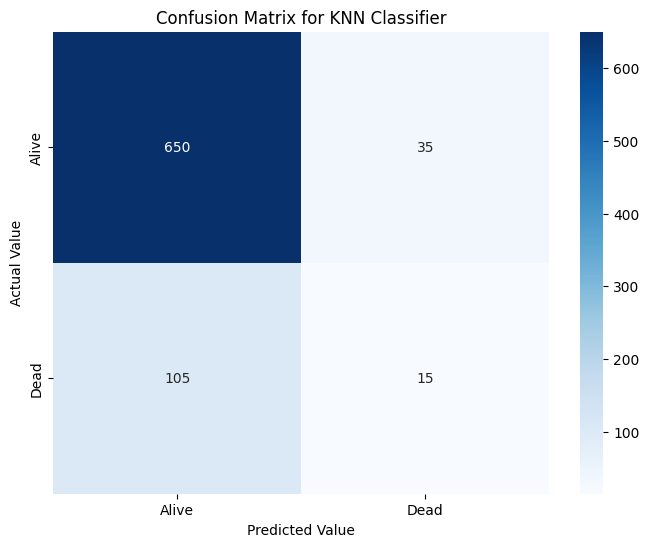

In [533]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [534]:
# Finding out the Hyperparameters of KNN Classifier

print("KNN Hyperparameters:")
print(KNN.get_params())

KNN Hyperparameters:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [535]:
# Tuning the model for better performance

# Defining the hyperparameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],                     # Number of neighbors
    'weights': ['uniform', 'distance'],                     # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski'],      # Distance metric
    'p': [1, 2],                                            # Minkowski distance parameter (p=1 for Manhattan, p=2 for Euclidean)
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Test the model on the test set
best_KNN = grid_search.best_estimator_
test_accuracy = best_KNN.score(X_test, y_test)
print("Test Set Accuracy:", test_accuracy)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.8462254764641672
Test Set Accuracy: 0.8472049689440994


Accuracy of tuned model: 84.72%


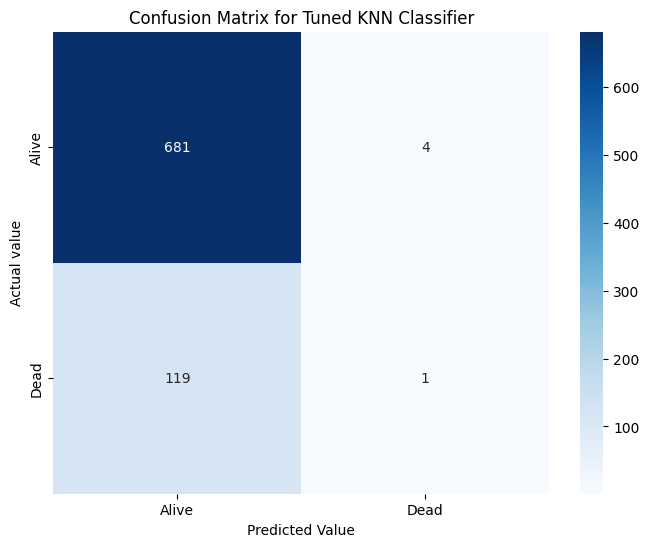

In [536]:
# Using the Hyperparameters found via GridSearchCV to tune and Re-train the model

# Train the best model on the full training data
best_KNN.fit(X_train, y_train)

# Predict on the test data
y_pred = best_KNN.predict(X_test)

# Evaluate the accuracy of the tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of tuned model: {accuracy * 100:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Tuned KNN Classifier')
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.show()

#### List of features used for building the classification models and the data shape function output

In [538]:
print(Mort_prediction.columns)

Index(['Age', 'Race', 'Marital Status', 'Adopted Status', 'T Stage', 'N Stage',
       '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Mortality_Status', 'Z-Score',
       'Tumor_Outliers'],
      dtype='object')


In [539]:
print(Mort_prediction.shape)

(4024, 18)


### Task (5) - Model Evaluation

#### (d) Checking whether the selected model (Logistic Regression) is overfitting or underfitting or is a good fit

##### Comparing Train and Test accuracy parameters for model fit

In [543]:
# Building a classification model using Logistic Regression

# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Converting Categorical Data into Numerical data to fix errors in the model
from sklearn.preprocessing import LabelEncoder

X = Mort_prediction.drop('Mortality_Status', axis=1)
y = Mort_prediction['Mortality_Status']

# Convert categorical features to numerical using OneHotEncoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=200)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg_model.predict(X_test)

In [544]:
# Using Performance metrics to check for model fitting

from sklearn.metrics import accuracy_score

train_predictions = log_reg_model.predict(X_train)
test_predictions = log_reg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.86
Testing Accuracy: 0.87


##### Optionally plotting a learning curve to check model fitting

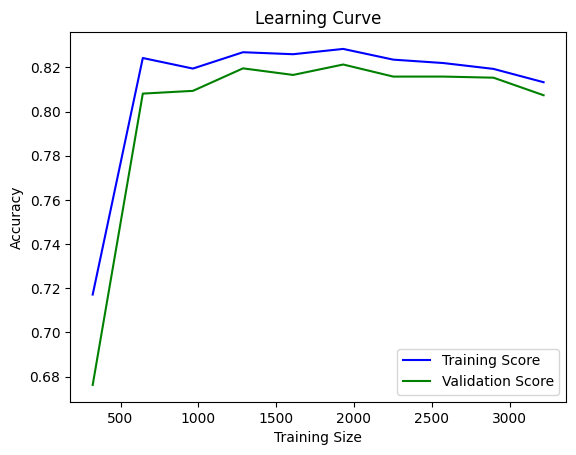

In [546]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='green')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Part (B): Breast Cancer Survival Rate Prediction

### Task (1) – Domain Understanding: Regression

In [549]:
# Getting a dataset to use for this problem

Survival_rate = Mort_pred
Survival_rate.head(6)

,Patient ID,Month of Birth,Age,Sex,Race,Marital Status,Occupation Code,Adopted Status,T Stage,N Stage,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,A0012,12,68.0,Female,White,Married,11.0,1,T1,N1,...,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,A0013,12,50.0,Female,White,Married,11.0,0,T2,N2,...,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,A0014,11,58.0,Female,White,Divorced,9.0,0,T3,N3,...,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,A0015,3,58.0,Female,White,Married,10.0,0,T1,N1,...,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,A0016,1,47.0,Female,White,Married,12.0,0,T2,N1,...,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive
5,A0017,2,51.0,Female,White,Single,6.0,1,T1,N1,...,Moderately differentiated,2,Regional,20.0,Positive,Positive,18,2,89,Alive


In [550]:
# Getting the size of the data set before cleaning

Survival_rate.shape

(4024, 21)

In [551]:
# Displaying the names of columns and their information

Survival_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient ID              4024 non-null   object 
 1   Month of Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     3947 non-null   object 
 4   Race                    4024 non-null   object 
 5   Marital Status          4024 non-null   object 
 6   Occupation Code         4021 non-null   float64
 7   Adopted Status          4024 non-null   int64  
 8   T Stage                 4024 non-null   object 
 9   N Stage                 4024 non-null   object 
 10  6th Stage               4024 non-null   object 
 11  differentiate           4024 non-null   object 
 12  Grade                   4024 non-null   int64  
 13  A Stage                 4024 non-null   object 
 14  Tumor Size              4021 non-null   

In [552]:
# Cleaning the column names
Survival_rate.columns = Survival_rate.columns.str.strip()

print(Survival_rate.columns)

Index(['Patient ID', 'Month of Birth', 'Age', 'Sex', 'Race', 'Marital Status',
       'Occupation Code', 'Adopted Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Mortality_Status'],
      dtype='object')


In [553]:
# Making an array of columns to be dropped
columns_to_be_dropped = ['Patient ID','Month of Birth','Sex','Occupation Code','Mortality_Status']

In [554]:
# Dropping columns that are no longer needed
Survival_rate = Survival_rate.drop(columns=columns_to_be_dropped)
Survival_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4021 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4023 non-null   object 
 14  Reginol Node Positive   4024 non-null   

In [555]:
# Renaming columns to fix inconsistencies

Survival_rate.rename(columns={'Reginol Node Positive': 'Regional Node Positive'}, inplace=True)

# checking column names
Survival_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4021 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4023 non-null   object 
 14  Regional Node Positive  4024 non-null   

In [556]:
# Checking the size of the 'retained' data

Survival_rate.shape

(4024, 16)

### Task (2) – Data Understanding: Producing Your Experimental Designing

#### Dealing with outliers and missing values

In [559]:
# Finding out the number of missing values in each feature

Survival_rate.columns.isna()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

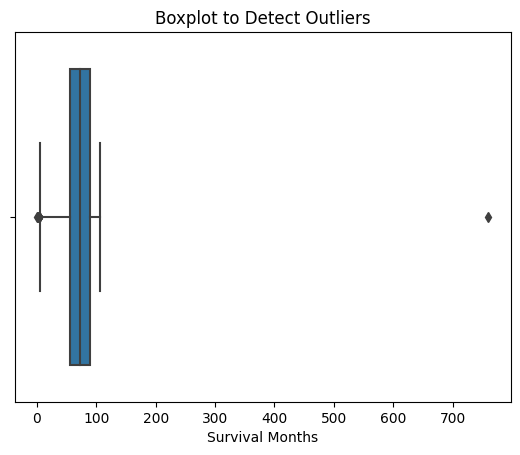

In [560]:
# Visualizing outliers in the "Survival Months" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Survival Months')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [561]:
# Using Winsorizing / Capping method to cap the outliers within 3 standard deviations (99th percentiles)

lower_cap = Survival_rate['Survival Months'].quantile(0.01)
upper_cap = Survival_rate['Survival Months'].quantile(0.99)
Survival_rate['Survival Months'] = np.clip(Survival_rate['Survival Months'], lower_cap, upper_cap)

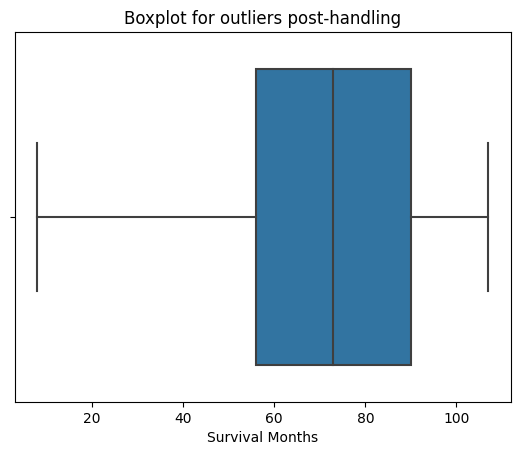

In [562]:
# Visualizing outliers in the "Survival Months" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Survival Months')
plt.title("Boxplot for outliers post-handling")
plt.show()

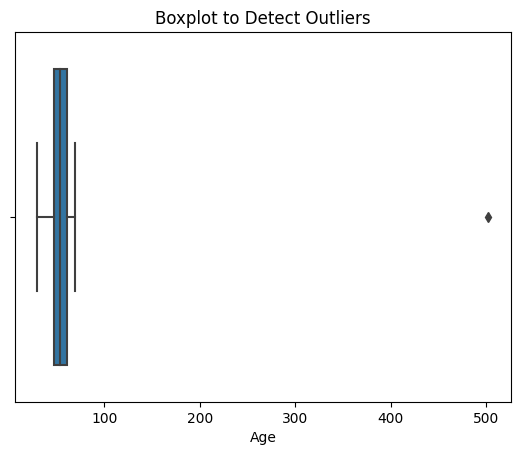

In [563]:
# Visualizing outliers in the "Age" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Age')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [564]:
# Using Winsorizing / Capping method to cap the outliers within 3 standard deviations (99th percentiles)

lower_cap = Survival_rate['Age'].quantile(0.01)
upper_cap = Survival_rate['Age'].quantile(0.99)
Survival_rate['Age'] = np.clip(Survival_rate['Age'], lower_cap, upper_cap)

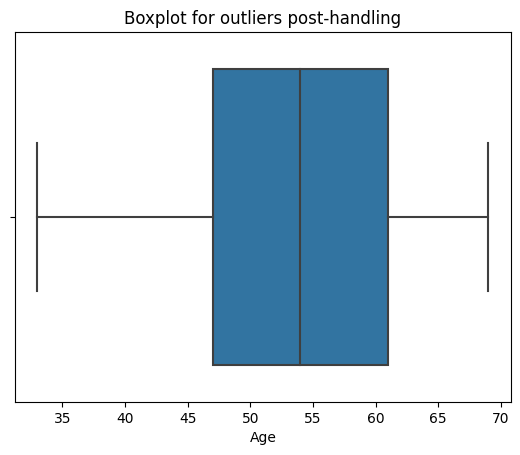

In [565]:
# Visualizing outliers in the "Age" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Age')
plt.title("Boxplot for outliers post-handling")
plt.show()

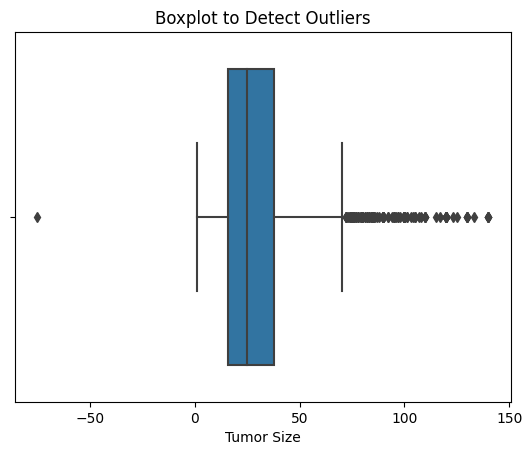

In [566]:
# Visualizing outliers in the "Tumor Size" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Tumor Size')
plt.title("Boxplot to Detect Outliers")
plt.show()

In [567]:
# Dealing with outliers in the "Tumor size" feature
# Calculating Z-scores
mean = Survival_rate['Tumor Size'].mean()
STDEV = Survival_rate['Tumor Size'].std()
Survival_rate['Z-Score'] = (Survival_rate['Tumor Size'] - mean) / STDEV

# Defining a threshold
threshold = 3

# Identifying the outliers
Survival_rate['Tumor_Outliers'] = Survival_rate['Z-Score'].apply(lambda x: 'Yes' if abs(x) > threshold else 'No')

# Capping the outliers
upper_limit = mean + 2 * STDEV
lower_limit = mean - 1 * STDEV

Survival_rate['Tumor Size'] = np.where(Survival_rate['Tumor Size'] > upper_limit, upper_limit,
                            np.where(Survival_rate['Tumor Size'] < lower_limit, lower_limit, Survival_rate['Tumor Size']))

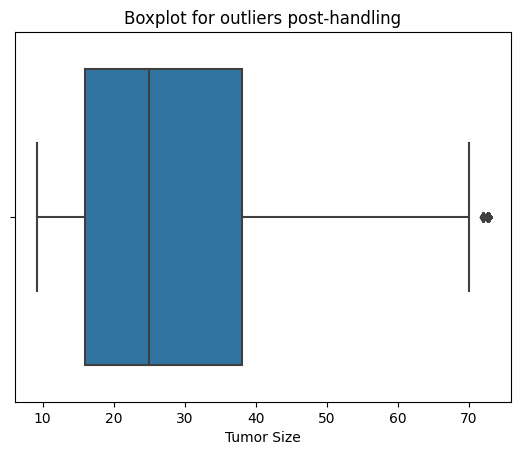

In [568]:
# Visualizing outliers in the "Tumor Size" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Tumor Size')
plt.title("Boxplot for outliers post-handling")
plt.show()

In [569]:
# Checking and converting data types of 'Regional Node Examined' for consistencies

Survival_rate['Regional Node Examined'] = pd.to_numeric(Survival_rate['Regional Node Examined'], errors='coerce')
print(Survival_rate['Regional Node Examined'].dtype)

float64


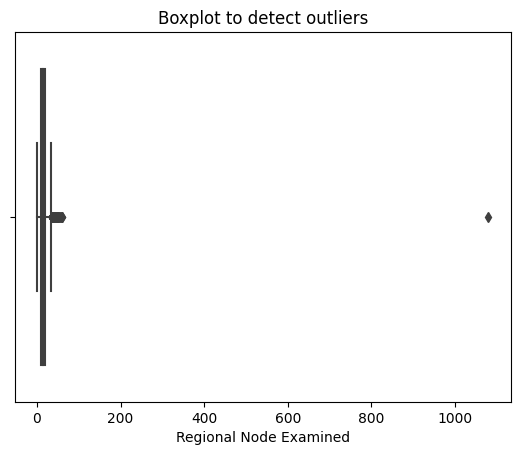

In [570]:
# Visualizing outliers in the "Regional Node Examined" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Regional Node Examined')
plt.title("Boxplot to detect outliers")
plt.show()

In [571]:
# Using Winsorizing / Capping method to cap the outliers within 2 standard deviations (95th percentile)

lower_cap = Survival_rate['Regional Node Examined'].quantile(0.01)
upper_cap = Survival_rate['Regional Node Examined'].quantile(0.95)
Survival_rate['Regional Node Examined'] = np.clip(Survival_rate['Regional Node Examined'], lower_cap, upper_cap)

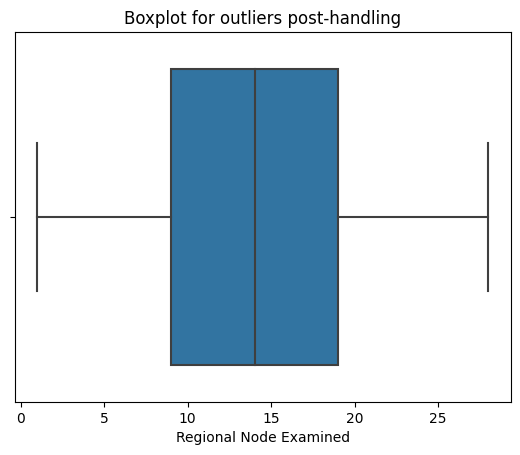

In [572]:
# Visualizing outliers in the "Regional Node Examined" feature using a boxplot

sns.boxplot(data=Survival_rate, x='Regional Node Examined')
plt.title("Boxplot for outliers post-handling")
plt.show()

#### Plotting the distribution of the target variable using a histogram

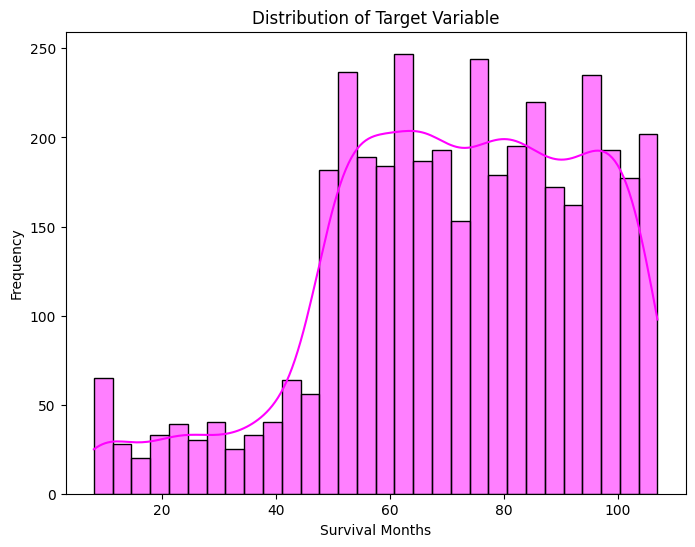

In [574]:
# Plotting a distribution of the target variable

# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the properties of the chart
plt.figure(figsize=(8, 6))
sns.histplot(Survival_rate['Survival Months'], kde=True, bins=30, color='magenta')

plt.title('Distribution of Target Variable')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.show()

In [575]:
Survival_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4015 non-null   float64
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Adopted Status          4024 non-null   int64  
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   differentiate           4024 non-null   object 
 8   Grade                   4024 non-null   int64  
 9   A Stage                 4024 non-null   object 
 10  Tumor Size              4021 non-null   float64
 11  Estrogen Status         4024 non-null   object 
 12  Progesterone Status     4024 non-null   object 
 13  Regional Node Examined  4022 non-null   float64
 14  Regional Node Positive  4024 non-null   

In [576]:
# Checking and converting data types of 'Adopted Status' for consistencies

Survival_rate['Adopted Status'] = Survival_rate['Adopted Status'].astype('category')
print(Survival_rate['Adopted Status'].dtype)

category


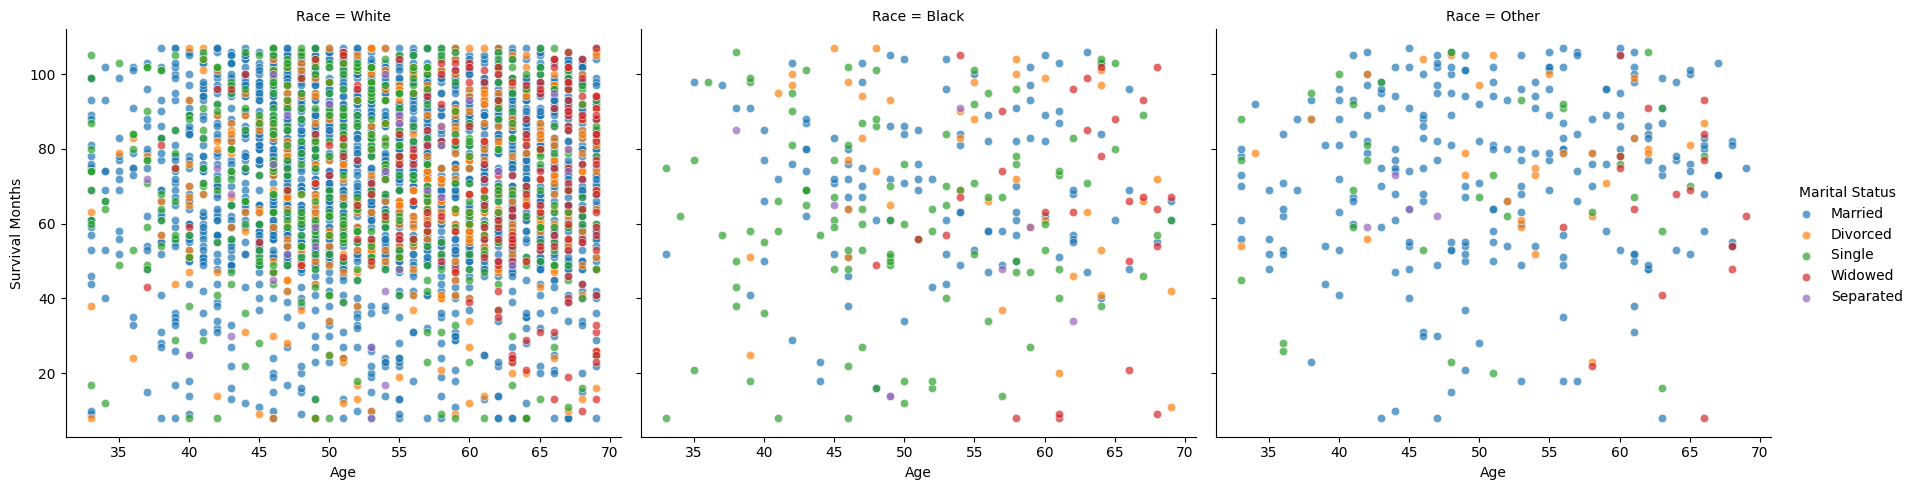

In [577]:
# Making a combined Facet Chart to display Age, Race, Marital Status against the Survival Months

g = sns.FacetGrid(Survival_rate, col="Race", hue="Marital Status", height=5, aspect=1.2)
g.map(sns.scatterplot, "Age", "Survival Months", alpha=0.7)
g.add_legend()
plt.show()

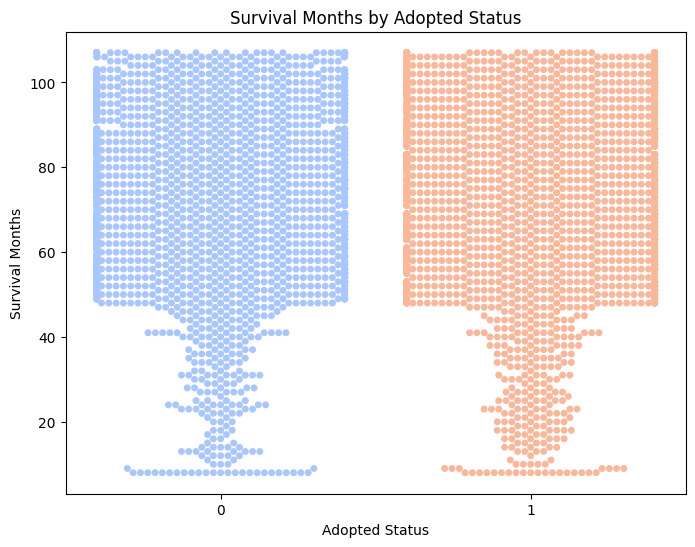

In [578]:
# Plotting Adopted Status vs Survival Months

plt.figure(figsize=(8, 6))
sns.swarmplot(data=Survival_rate, x='Adopted Status', y='Survival Months', palette='coolwarm')
plt.title("Survival Months by Adopted Status")
plt.xlabel("Adopted Status")
plt.ylabel("Survival Months")
plt.show()

In [579]:
# Checking and converting data types of all stages for consistencies

Survival_rate['T Stage'] = Survival_rate['T Stage'].astype('category')
Survival_rate['N Stage'] = Survival_rate['N Stage'].astype('category')
Survival_rate['6th Stage'] = Survival_rate['6th Stage'].astype('category')
Survival_rate['A Stage'] = Survival_rate['A Stage'].astype('category')
print(Survival_rate['T Stage'].dtype)
print(Survival_rate['N Stage'].dtype)
print(Survival_rate['6th Stage'].dtype)
print(Survival_rate['A Stage'].dtype)

category
category
category
category


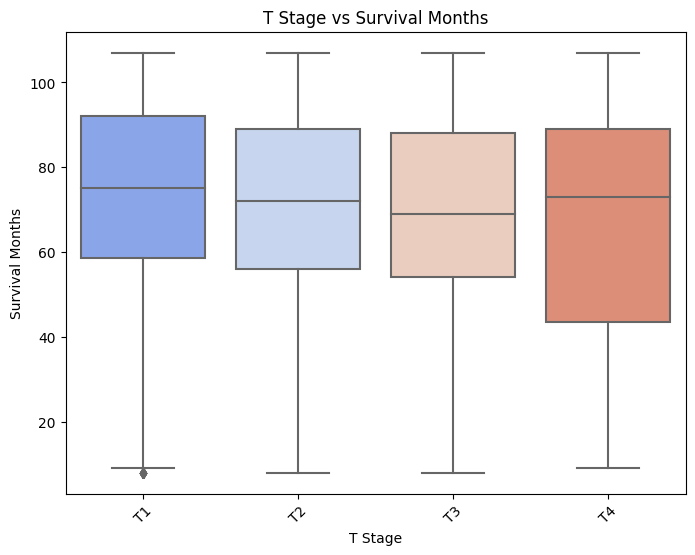

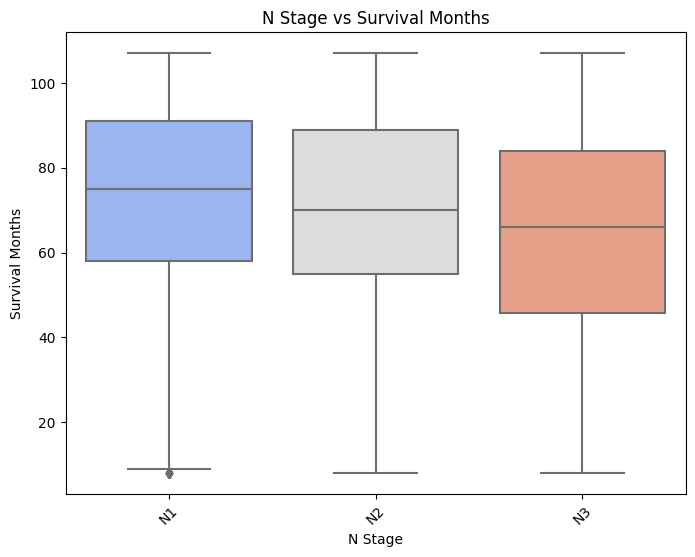

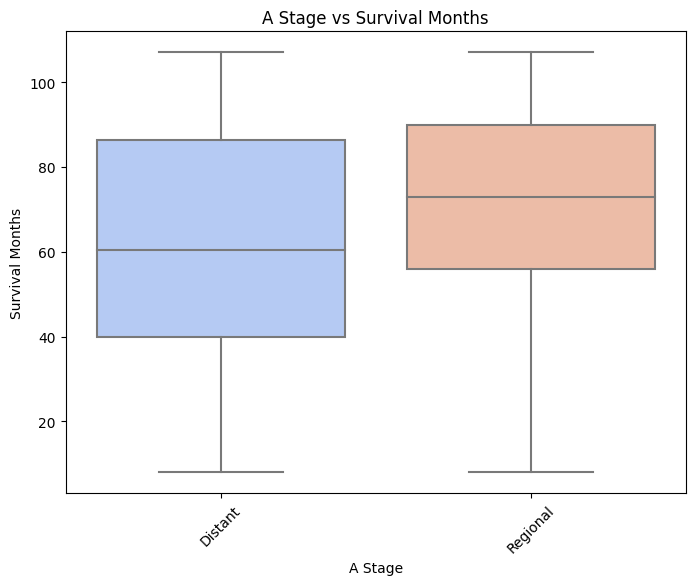

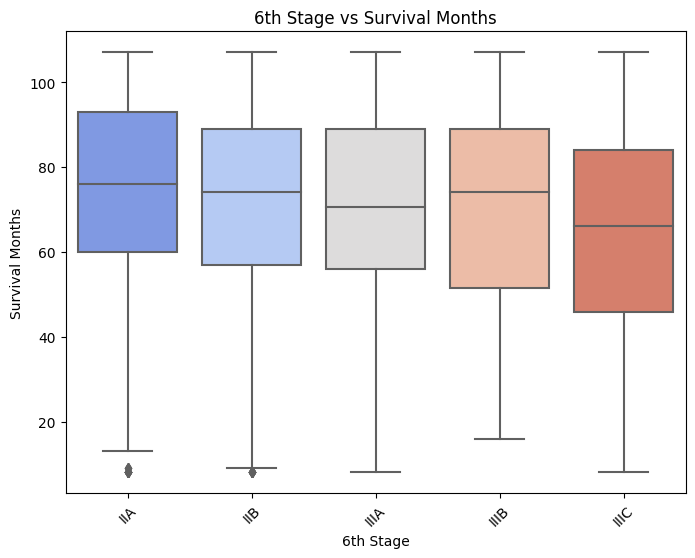

In [580]:
# List of stage variables to plot against Survival Months
stage_variables = ['T Stage', 'N Stage', 'A Stage', '6th Stage']

# Plot boxplots for each stage variable
for stage in stage_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Survival_rate, x=stage, y='Survival Months', palette='coolwarm')
    plt.title(f'{stage} vs Survival Months')
    plt.xlabel(stage)
    plt.ylabel('Survival Months')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

In [581]:
Survival_rate.columns

Index(['Age', 'Race', 'Marital Status', 'Adopted Status', 'T Stage', 'N Stage',
       '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size',
       'Estrogen Status', 'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Z-Score',
       'Tumor_Outliers'],
      dtype='object')

In [582]:
# Checking and converting data types of "differentiate" and "Grade" for consistencies

Survival_rate['differentiate'] = Survival_rate['differentiate'].astype('category')
Survival_rate['Grade'] = Survival_rate['Grade'].astype('int64')
print(Survival_rate['differentiate'].dtype)
print(Survival_rate['Grade'].dtype)

category
int64


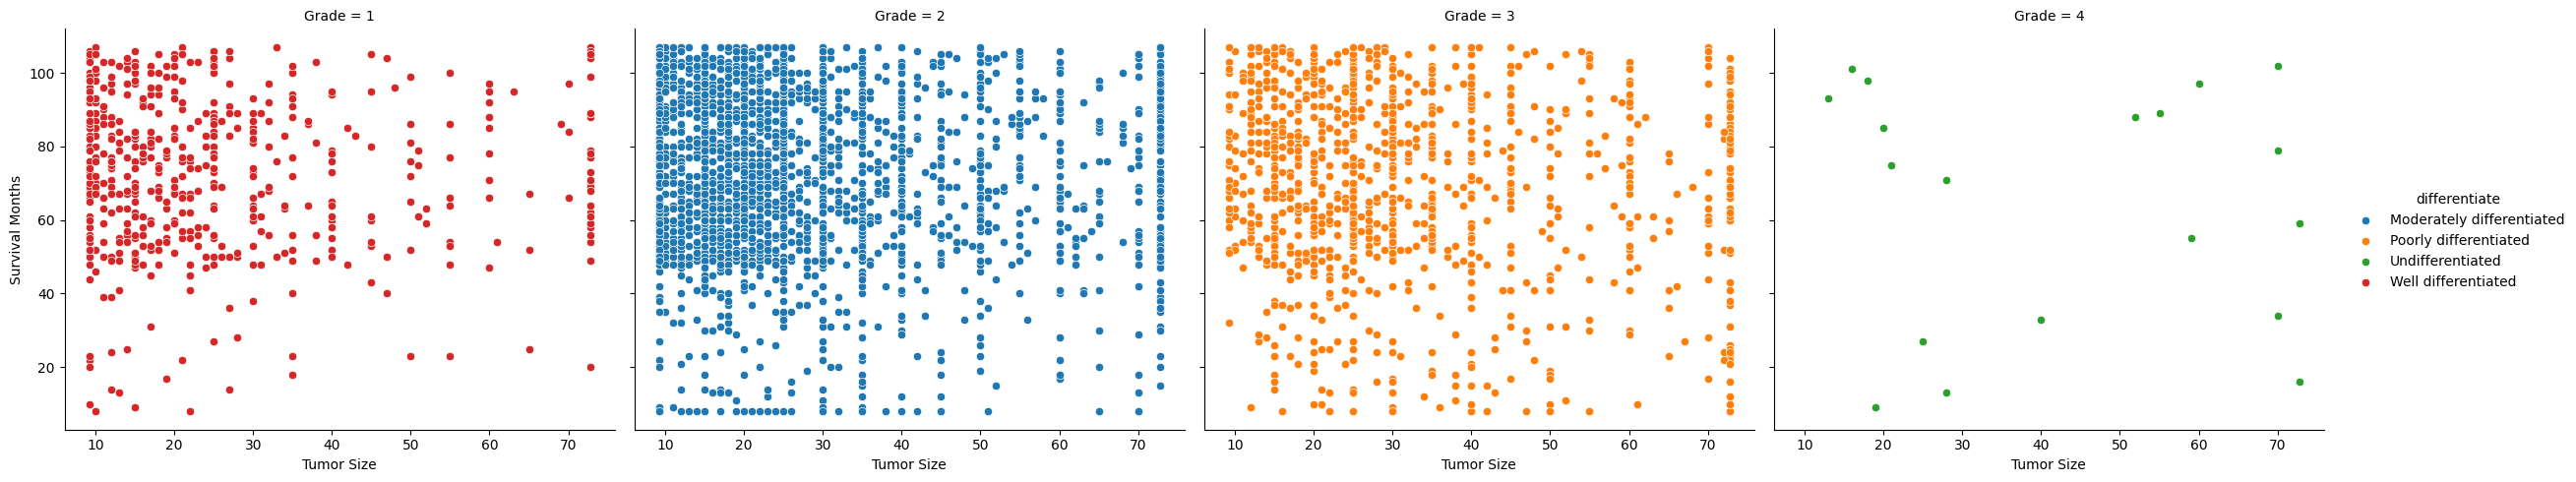

In [583]:
# Create FacetGrid for "Grade", "differentitate", "Tumor Size" against Survival Months
g = sns.FacetGrid(Survival_rate, col="Grade", hue='differentiate', height=5, aspect=1.2)
g.map(sns.scatterplot, "Tumor Size", "Survival Months")
g.add_legend()
plt.show()

In [584]:
# Handling Missing values in the regional nodes columns

# Dropping missing values for 'Regional Node Examined'
Survival_rate['Regional Node Examined'] = Survival_rate['Regional Node Examined'].dropna()

# Dropping missing values for 'Regional Node Positive'
Survival_rate['Regional Node Positive'] = Survival_rate['Regional Node Positive'].dropna()

# Convert the column to numeric, coercing errors to NaN
Survival_rate['Regional Node Examined'] = pd.to_numeric(Survival_rate['Regional Node Examined'], errors='coerce')
Survival_rate['Regional Node Positive'] = pd.to_numeric(Survival_rate['Regional Node Positive'], errors='coerce')

# Drop rows whith NaN (which were originally text values)
Survival_rate = Survival_rate.dropna(subset=['Regional Node Examined'])
Survival_rate = Survival_rate.dropna(subset=['Regional Node Positive'])

In [585]:
# Checking and converting data types of the Hormonal Receptors and Regional Nodes for consistencies

Survival_rate['Estrogen Status'] = Survival_rate['Estrogen Status'].astype('category')
Survival_rate['Progesterone Status'] = Survival_rate['Progesterone Status'].astype('category')
Survival_rate['Regional Node Examined'] = Survival_rate['Regional Node Examined'].astype('float64')
Survival_rate['Regional Node Positive'] = Survival_rate['Regional Node Positive'].astype('float64')

print(Survival_rate['Estrogen Status'].dtype)
print(Survival_rate['Progesterone Status'].dtype)
print(Survival_rate['Regional Node Examined'].dtype)
print(Survival_rate['Regional Node Positive'].dtype)

category
category
float64
float64


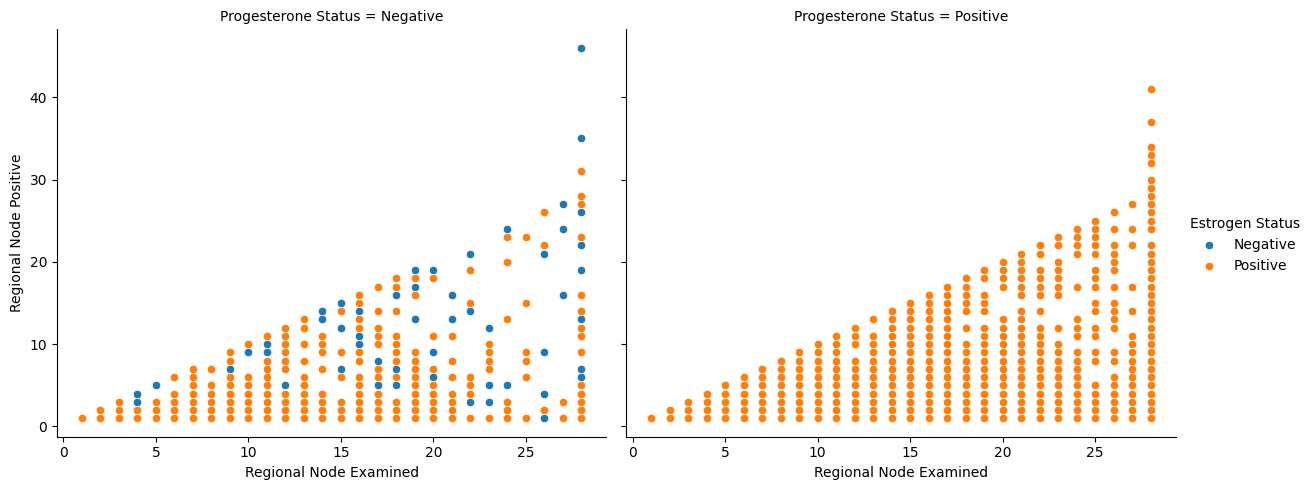

In [586]:
# Create FacetGrid for "Progesterone Status", "Estrogen Status", "Regional Node Examined", "Regional Node Positive" against Survival Months
g = sns.FacetGrid(Survival_rate, col="Progesterone Status", hue='Estrogen Status', height=5, aspect=1.2)
g.map(sns.scatterplot, "Regional Node Examined", "Regional Node Positive")
g.add_legend()
plt.show()

### Task (3) – Data Preprocessing: Transforming your data

In [588]:
#viewing the data

Survival_rate.head(10)

,Age,Race,Marital Status,Adopted Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Z-Score,Tumor_Outliers
0,68.0,White,Married,1,T1,N1,IIA,Poorly differentiated,3,Regional,9.258219,Positive,Positive,24.0,1.0,60,-1.248485,No
1,50.0,White,Married,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.000000,Positive,Positive,14.0,5.0,62,0.216468,No
2,58.0,White,Divorced,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.000000,Positive,Positive,14.0,7.0,75,1.539652,No
3,58.0,White,Married,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.000000,Positive,Positive,2.0,1.0,84,-0.586893,No
4,47.0,White,Married,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.000000,Positive,Positive,3.0,1.0,50,0.500008,No
5,51.0,White,Single,1,T1,N1,IIA,Moderately differentiated,2,Regional,20.000000,Positive,Positive,18.0,2.0,89,-0.492380,No
6,51.0,White,Married,0,T1,N1,IIA,Well differentiated,1,Regional,9.258219,Positive,Positive,11.0,1.0,54,-1.059459,No
7,40.0,White,Married,1,T2,N1,IIB,Moderately differentiated,2,Regional,30.000000,Positive,Positive,9.0,1.0,14,-0.019815,No
8,40.0,White,Divorced,1,T4,N3,IIIC,Poorly differentiated,3,Regional,72.741459,Positive,Positive,20.0,18.0,70,3.429915,Yes
9,69.0,White,Married,0,T4,N3,IIIC,Well differentiated,1,Distant,32.000000,Positive,Positive,21.0,12.0,92,0.074699,No


In [589]:
# dropping unncessary columns

Columns_to_drop = ['Z-Score', 'Tumor_Outliers']
Survival_rate = Survival_rate.drop(columns=Columns_to_drop)
Survival_rate.head()

,Age,Race,Marital Status,Adopted Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68.0,White,Married,1,T1,N1,IIA,Poorly differentiated,3,Regional,9.258219,Positive,Positive,24.0,1.0,60
1,50.0,White,Married,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.000000,Positive,Positive,14.0,5.0,62
2,58.0,White,Divorced,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.000000,Positive,Positive,14.0,7.0,75
3,58.0,White,Married,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.000000,Positive,Positive,2.0,1.0,84
4,47.0,White,Married,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.000000,Positive,Positive,3.0,1.0,50


In [590]:
Survival_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     4013 non-null   float64 
 1   Race                    4022 non-null   object  
 2   Marital Status          4022 non-null   object  
 3   Adopted Status          4022 non-null   category
 4   T Stage                 4022 non-null   category
 5   N Stage                 4022 non-null   category
 6   6th Stage               4022 non-null   category
 7   differentiate           4022 non-null   category
 8   Grade                   4022 non-null   int64   
 9   A Stage                 4022 non-null   category
 10  Tumor Size              4019 non-null   float64 
 11  Estrogen Status         4022 non-null   category
 12  Progesterone Status     4022 non-null   category
 13  Regional Node Examined  4022 non-null   float64 
 14  Regional Node Positive  4022 

### Task (4) – Modelling: Build Predictive Regression Models

#### Preprocessing

In [593]:
# Splitting the main dataset into 2

# Model 1 contains Numeric Features only
Model1 = Survival_rate[['Age','Adopted Status','Grade', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive', 'Survival Months']]

# Model 2 Contains all retained features
Model2 = Survival_rate

In [594]:
Model1.head()

,Age,Adopted Status,Grade,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
0,68.0,1,3,9.258219,24.0,1.0,60
1,50.0,0,2,35.000000,14.0,5.0,62
2,58.0,0,2,63.000000,14.0,7.0,75
3,58.0,0,3,18.000000,2.0,1.0,84
4,47.0,0,3,41.000000,3.0,1.0,50


In [595]:
Model2.head()

,Age,Race,Marital Status,Adopted Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68.0,White,Married,1,T1,N1,IIA,Poorly differentiated,3,Regional,9.258219,Positive,Positive,24.0,1.0,60
1,50.0,White,Married,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.000000,Positive,Positive,14.0,5.0,62
2,58.0,White,Divorced,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.000000,Positive,Positive,14.0,7.0,75
3,58.0,White,Married,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.000000,Positive,Positive,2.0,1.0,84
4,47.0,White,Married,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.000000,Positive,Positive,3.0,1.0,50


#### Using an 80:20 Train-Test split on model 1 using Decision tree regressor

In [597]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [598]:
# Selecting the features and target columns

X = Model1.drop(columns=['Survival Months'])  # Dropping the target column
y = Model1['Survival Months']                 # Generating a new Target variable

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor
Model1_reg = DecisionTreeRegressor(random_state=42)

In [599]:
# Training the model
Model1_reg.fit(X_train, y_train)

# Make predictions (Testing the model)
y_pred = Model1_reg.predict(X_test)

# Checking the dataset
Model1.head()

,Age,Adopted Status,Grade,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
0,68.0,1,3,9.258219,24.0,1.0,60
1,50.0,0,2,35.000000,14.0,5.0,62
2,58.0,0,2,63.000000,14.0,7.0,75
3,58.0,0,3,18.000000,2.0,1.0,84
4,47.0,0,3,41.000000,3.0,1.0,50


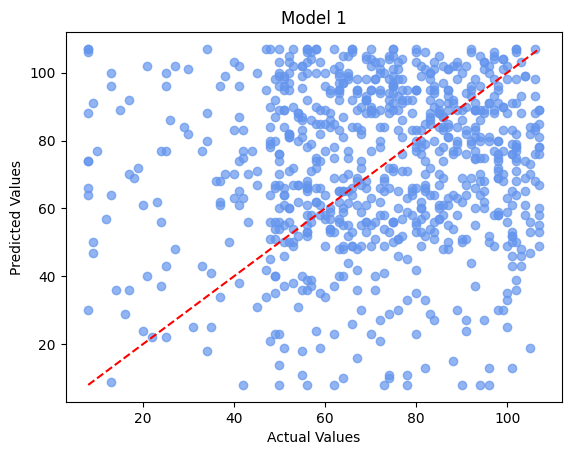

In [600]:
# Plotting the predicted values vs actual values in a scatterplot

import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.7, color='cornflowerblue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Model 1")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal fit line
plt.show()

#### Model 1 Evaluation

In [602]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using the trained model
y_pred = Model1_reg.predict(X_test)

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

Mean Absolute Error (MAE): 25.014285714285716
Mean Squared Error (MSE): 994.8754658385093
R-Squared (R²): -0.9460941911520127


#### Displaying the training & testing dimensions and feature names for model 1

In [604]:
# Displaying dimensions
print("Training set dimensions:", X_train.shape, y_train.shape)
print("Test set dimensions:", X_test.shape, y_test.shape)

# Displaying feature names
model_1_features = X.columns.tolist()
print("\nFeatures used for Model 1:")
print(model_1_features)

Training set dimensions: (3217, 6) (3217,)
Test set dimensions: (805, 6) (805,)

Features used for Model 1:
['Age', 'Adopted Status', 'Grade', 'Tumor Size', 'Regional Node Examined', 'Regional Node Positive']


#### Using an 80:20 Train-Test split on model 2 using Decision tree regressor

In [606]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [607]:
# Separating features and target variables 
X = Model2.drop(columns=['Survival Months'])  # Features
y = Model2['Survival Months']                 # Target

In [608]:
# Identifying categorical columns

categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col in X.columns]


# One-hot encoding categorical variables to make them numeric

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(encoder.fit_transform(X[categorical_cols]),
                            columns=encoder.get_feature_names_out(categorical_cols),
                            index=X.index)

# Replacing original categorical columns with encoded ones
X = pd.concat([X.drop(columns=categorical_cols), encoded_cats], axis=1)

# Ensuring numeric data is cleaned

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean())                           # Impute missing values instead of dropping rows

# Align y to match the cleaned X
y = y[X.index]

# Check if X and y have the same shape after cleaning
print("Shape of X after preprocessing:", X.shape)
print("Shape of y after alignment:", y.shape)

Shape of X after preprocessing: (4022, 19)
Shape of y after alignment: (4022,)


In [609]:
# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

# Initializing the Decision Tree Regressor
Model2_reg = DecisionTreeRegressor(random_state=42)

In [610]:
# Training the model
Model2_reg.fit(X_train, y_train)

# Make predictions (Testing the model)
y_pred = Model2_reg.predict(X_test)

# Checking the dataset
Model2.head()

,Age,Race,Marital Status,Adopted Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,68.0,White,Married,1,T1,N1,IIA,Poorly differentiated,3,Regional,9.258219,Positive,Positive,24.0,1.0,60
1,50.0,White,Married,0,T2,N2,IIIA,Moderately differentiated,2,Regional,35.000000,Positive,Positive,14.0,5.0,62
2,58.0,White,Divorced,0,T3,N3,IIIC,Moderately differentiated,2,Regional,63.000000,Positive,Positive,14.0,7.0,75
3,58.0,White,Married,0,T1,N1,IIA,Poorly differentiated,3,Regional,18.000000,Positive,Positive,2.0,1.0,84
4,47.0,White,Married,0,T2,N1,IIB,Poorly differentiated,3,Regional,41.000000,Positive,Positive,3.0,1.0,50


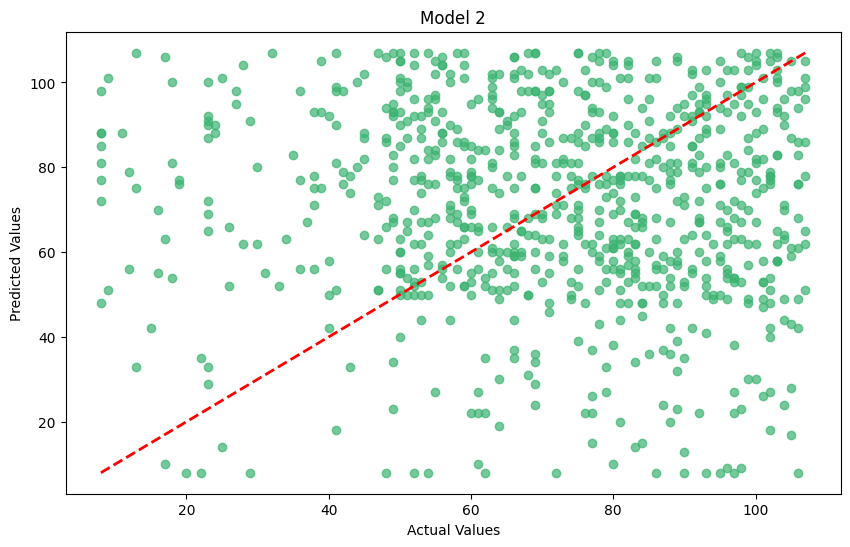

In [611]:
# Plotiting the predicted values vs actual values using a scatterplot

# Comparing predictions with actual values
import matplotlib.pyplot as plt

# Predict the values
y_pred = Model2_reg.predict(X_test)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='mediumseagreen')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linestyle= '--', lw=2)
plt.title("Model 2")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#### Model 2 Evaluation

In [613]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions using the trained model
y_pred = Model2_reg.predict(X_test)

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

Mean Absolute Error (MAE): 26.67950310559006
Mean Squared Error (MSE): 1143.703105590062
R-Squared (R²): -1.1374347082988217


#### Displaying the training & testing dimensions and feature names for model 2

In [615]:
# Displaying dimensions
print("Training set dimensions:", X_train.shape, y_train.shape)
print("Test set dimensions:", X_test.shape, y_test.shape)

# Displaying feature names
model_2_features = X.columns.tolist()
print("\nFeatures used for Model 2:")
print(model_2_features)

Training set dimensions: (3217, 19) (3217,)
Test set dimensions: (805, 19) (805,)

Features used for Model 2:
['Age', 'Adopted Status', 'T Stage', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Regional Node Positive', 'Race_Other', 'Race_White', 'Marital Status_Married', 'Marital Status_Separated', 'Marital Status_Single ', 'Marital Status_Widowed']


### Task (5) – Evaluation: How good are your models

#### Pruning the selected model for better results

In [618]:
# importing the libraries

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

In [619]:
# Rebuilding the Decision Tree model with pre-pruning to 4 levels

model_pruned = DecisionTreeRegressor(random_state=35, max_depth=4)


# Split data into training and test sets
X = Model1.drop(columns=['Survival Months'])
y = Model1['Survival Months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [620]:
# Training the pruned model

model_pruned.fit(X_train, y_train)


# Predict on test data

y_pred_pruned = model_pruned.predict(X_test)

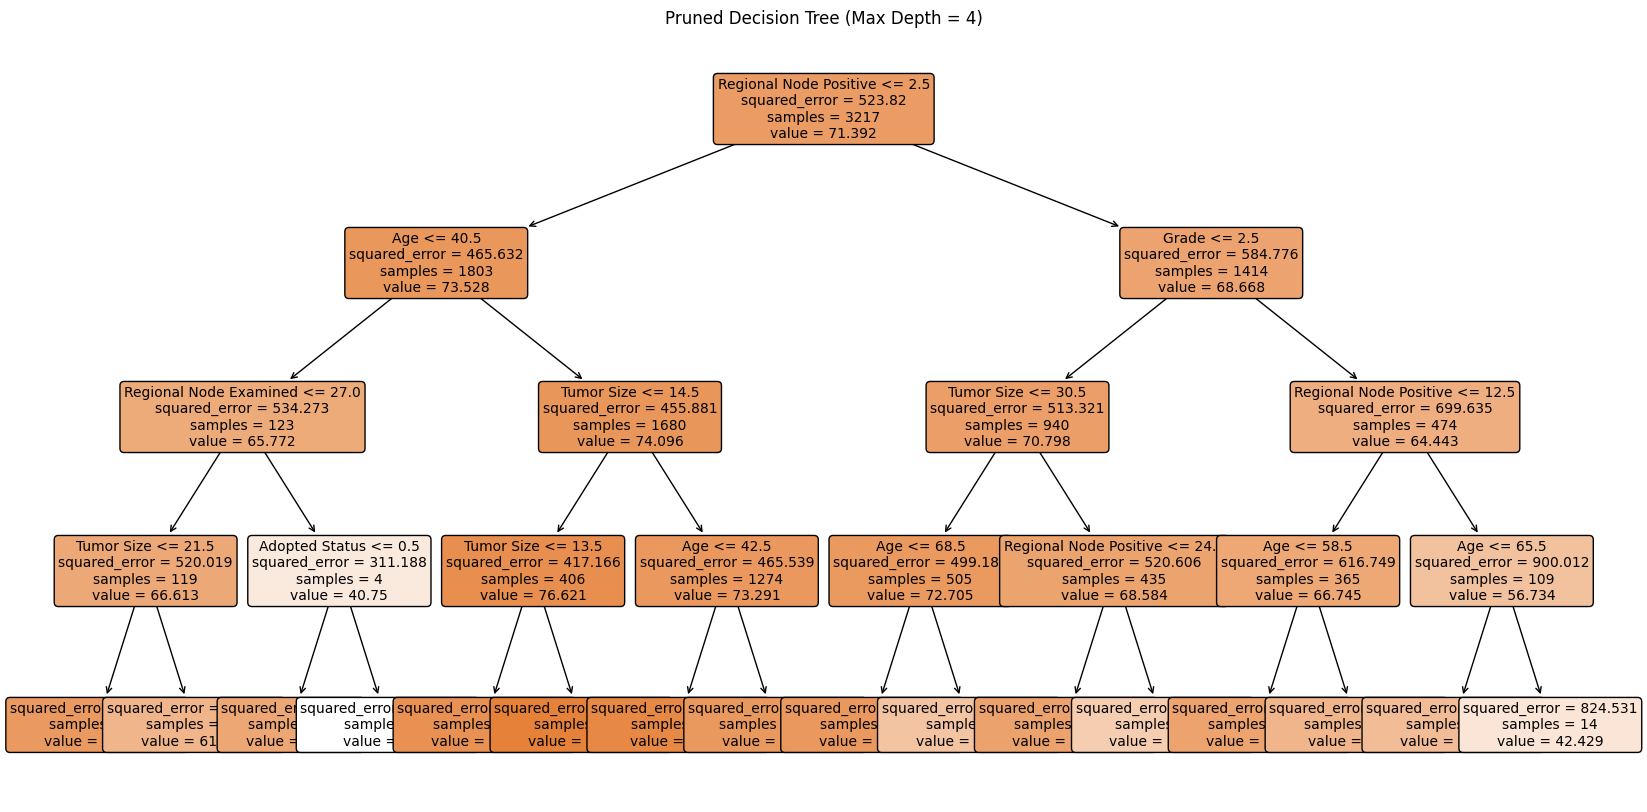

In [621]:
# Plot the pruned decision tree

plt.figure(figsize=(20, 10))
tree.plot_tree(model_pruned, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree (Max Depth = 4)")
plt.show()

#### Predicting on Given patient data

In [623]:
# Importing Libraries
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [624]:
# Defining the patient's data in a dictionary

patient_data = {
    'Month of Birth': ['July'],
    'Age': [56],
    'Sex': ['Female'],
    'Race': ['White'],
    'Marital Status': ['Single'],
    'Occupation Code': [15],
    'Adopted Status': [0], 
    'T Stage': ['T3'],
    'N Stage': ['N3'],
    '6th Stage': ['IIIC'],
    'Differentiate': ['Moderately differentiated'],
    'Grade': [2],
    'A Stage': ['Regional'],
    'Tumour Size': [41],
    'Estrogen Status': ['Positive'],
    'Progesterone Status': ['Positive'],
    'Regional Node Examined': [5],
    'Regional Node Positive': [1]
}

# Create a DataFrame from the dictionary
patient_df = pd.DataFrame(patient_data)

In [625]:
Model1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 0 to 4023
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     4013 non-null   float64 
 1   Adopted Status          4022 non-null   category
 2   Grade                   4022 non-null   int64   
 3   Tumor Size              4019 non-null   float64 
 4   Regional Node Examined  4022 non-null   float64 
 5   Regional Node Positive  4022 non-null   float64 
 6   Survival Months         4022 non-null   int64   
dtypes: category(1), float64(4), int64(2)
memory usage: 353.0 KB


In [626]:
# Manually encoding the "Adopted Status" column

patient_df['Adopted Status'] = patient_df['Adopted Status'].map({'Adopted': 1, 'Not Adopted': 0})

In [627]:
# One-hot encoding for training data
categorical_cols = X_train.select_dtypes(include=['object']).columns   # Get categorical columns from X_train

# Apply one-hot encoding on training data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train = encoder.fit_transform(X_train[categorical_cols])

# Convert the encoded categorical columns into a DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_cols))

# Replace the original categorical columns with encoded values in the training set
X_train_encoded = pd.concat([X_train.drop(columns=categorical_cols), encoded_train_df], axis=1)

In [628]:
# Prepare the new patient data (patient_df)

# Replace the original categorical columns with encoded values in the new patient data
patient_df_encoded = pd.concat([patient_df.drop(columns=categorical_cols), encoded_patient_df], axis=1)

In [629]:
# Ensure the patient data columns match the training set columns

# Add missing columns to align with the training set if needed (set default value to 0)

for col in X_train_encoded.columns:
    if col not in patient_df_encoded.columns:
        patient_df_encoded[col] = 0  # Add missing columns with default value 0

# Reorder the columns to match X_train_encoded
patient_df_encoded = patient_df_encoded[X_train_encoded.columns]

In [630]:
# Predict using the pruned model
survival_prediction = model_pruned.predict(patient_df_encoded)

# Display the predicted survival months for the patient
print(f"Predicted Survival Months for Patient B002565: {survival_prediction[0]:.2f}")

Predicted Survival Months for Patient B002565: 75.83


~ A project by Soham Mulye

Student ID: 21118061